# General


In [983]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew

In [984]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading of dataset as dataframe

In [985]:
df=pd.read_csv("drive/MyDrive/Colab Notebooks/ANN assignment/Employee.csv")

In [986]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [987]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


No null values - So no need of handling missing values

### Converting LeaveOrNot column to bool

Since we are going to do binary classification, we are converting it as boolean type from int -->> If it is int - it may be fall under Regression task instead of classification task

In [988]:
df['LeaveOrNot'] = df['LeaveOrNot'].astype(bool) # since we are going to do binary classification, we are converting it as boolean type from int
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                     bool
dtype: object

### Removing duplicate rows

In [989]:
df.duplicated().sum() #check Is there any duplicate value in the dataset

1889

In [990]:
df.drop_duplicates(inplace=True) # Remove the duplicate values in the dataset
df.shape[0] #Printing the no.of rows in the dataframe after dropping duplicate values

2764

If we don't remove duplicate values - then accuracy is increasing, but it's may due to the presence of same rows in test dataset. That's why I removed duplicate rows

### Checking variable column count

In [991]:
unique_counts = df['LeaveOrNot'].value_counts()
print(unique_counts)

False    1676
True     1088
Name: LeaveOrNot, dtype: int64


In [992]:
unique_counts = df['LeaveOrNot'].value_counts(normalize=True) #It will give in proportion form
print(unique_counts)

False    0.606368
True     0.393632
Name: LeaveOrNot, dtype: float64


Since this shows class imbalance, we need to do oversampling, but since we should not do oversampling for testing data, we can do oversampling at the last

In [993]:
unique_counts = df['PaymentTier'].value_counts()
print(unique_counts)

3    1976
2     570
1     218
Name: PaymentTier, dtype: int64


In [994]:
unique_counts = df['ExperienceInCurrentDomain'].value_counts()
print(unique_counts)

2    681
5    470
3    451
1    433
4    425
0    287
7      9
6      8
Name: ExperienceInCurrentDomain, dtype: int64


In [995]:
unique_counts = df['JoiningYear'].value_counts()
print(unique_counts)

2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: JoiningYear, dtype: int64


In [996]:
unique_counts = df['Education'].value_counts()
print(unique_counts)

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64


In [997]:
unique_counts = df['City'].value_counts()
print(unique_counts)

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64


In [998]:
unique_counts = df['EverBenched'].value_counts()
print(unique_counts)

No     2403
Yes     361
Name: EverBenched, dtype: int64


In [999]:
unique_counts = df['Gender'].value_counts()
print(unique_counts)

Male      1529
Female    1235
Name: Gender, dtype: int64


### Converting JoiningYear column as 2018 - JoiningYear difference

Since we are hadling JoiningYear as the int column, not the datetime datatype -->> So handling as the year does not give any numerical meaning. That's why I created new column called Years Since Joining and there I calculate the difference between 2018 and the year they join - I use 2018, since they have the data until 2018.

In [1000]:
# Calculate the new column
df['YearsSinceJoining'] = 2018 - df['JoiningYear'] # Since 2018 is the maximum among rows, I take the difference between 2018 and joining year
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,YearsSinceJoining
0,Bachelors,2017,Bangalore,3,34,Male,No,0,False,1
1,Bachelors,2013,Pune,1,28,Female,No,3,True,5
2,Bachelors,2014,New Delhi,3,38,Female,No,2,False,4
3,Masters,2016,Bangalore,3,27,Male,No,5,True,2
4,Masters,2017,Pune,3,24,Male,Yes,2,True,1


In [1001]:
# Drop the 'JoiningYear' column
df.drop(columns=['JoiningYear'], inplace=True)

In [1002]:
df.describe()

,PaymentTier,Age,ExperienceInCurrentDomain,YearsSinceJoining
count,2764.000000,2764.000000,2764.000000,2764.000000
mean,2.636035,30.952967,2.644356,2.909551
std,0.624001,5.108872,1.610610,1.885943
min,1.000000,22.000000,0.000000,0.000000
25%,2.000000,27.000000,1.000000,1.000000
50%,3.000000,30.000000,2.000000,3.000000
75%,3.000000,35.000000,4.000000,5.000000
max,3.000000,41.000000,7.000000,6.000000


Payment Tier: Categorization of employees into different salary tiers.

So it's a categorized value, like Integer encoding - No numerical meaning. So we don't need to include that when drawing Q-Q plot

# Question a

## Question a - 1

### Produce Q-Q plots

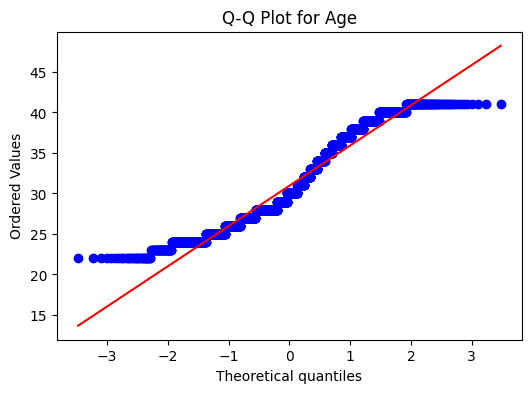

In [1003]:
data = df['Age']

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(data, dist='norm', plot=ax)
ax.set_title('Q-Q Plot for Age')
plt.show()


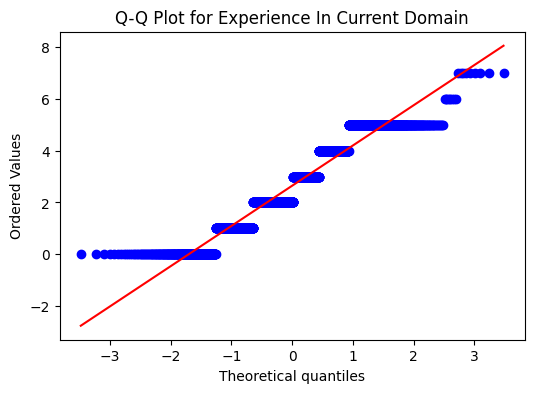

In [1004]:
data = df['ExperienceInCurrentDomain']

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(data, dist='norm', plot=ax)
ax.set_title('Q-Q Plot for Experience In Current Domain')
plt.show()

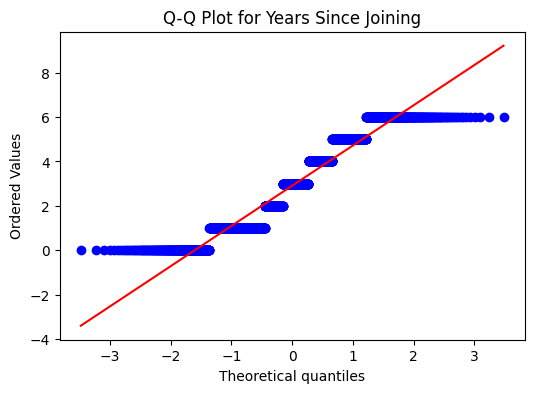

In [1005]:
data = df['YearsSinceJoining']

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(data, dist='norm', plot=ax)
ax.set_title('Q-Q Plot for Years Since Joining')
plt.show()

In [1006]:
correlation = df['YearsSinceJoining'].corr(df['ExperienceInCurrentDomain']) # Just to check is there any linear relationship between two columns
print("Correlation:", correlation)

Correlation: 0.031228337745925226


### Produce Histogram

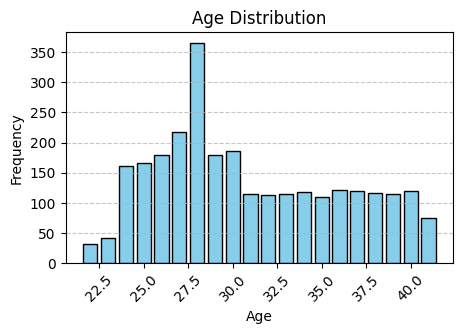

In [1007]:
age = df['Age']

# Count the frequency of each unique value
value_counts = age.value_counts()

# Sort the values by their index (Experience values)
sorted_counts = value_counts.sort_index()

# Create a bar plot to show the distribution of unique values
plt.figure(figsize=(5, 3))
plt.bar(sorted_counts.index, sorted_counts.values, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

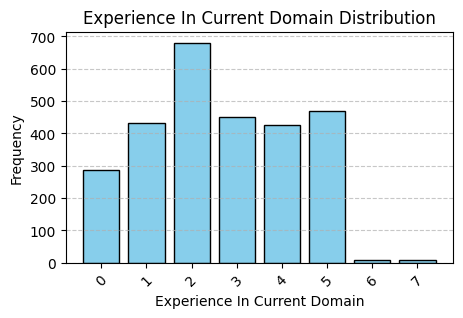

In [1008]:
experience_data = df['ExperienceInCurrentDomain']

# Count the frequency of each unique value
value_counts = experience_data.value_counts()

# Sort the values by their index (Experience values)
sorted_counts = value_counts.sort_index()

# Create a bar plot to show the distribution of unique values
plt.figure(figsize=(5,3))
plt.bar(sorted_counts.index, sorted_counts.values, color='skyblue', edgecolor='black')
plt.title('Experience In Current Domain Distribution')
plt.xlabel('Experience In Current Domain')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


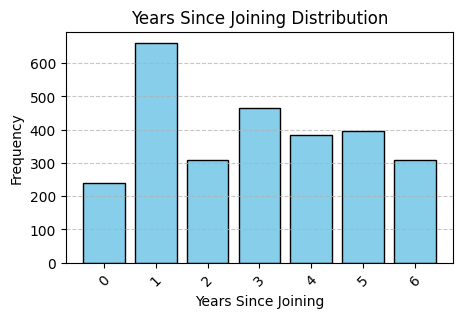

In [1009]:
years_since_joining = df['YearsSinceJoining']

# Count the frequency of each unique value
value_counts = years_since_joining.value_counts()

# Sort the values by their index (Experience values)
sorted_counts = value_counts.sort_index()

# Create a bar plot to show the distribution of unique values
plt.figure(figsize=(5,3))
plt.bar(sorted_counts.index, sorted_counts.values, color='skyblue', edgecolor='black')
plt.title('Years Since Joining Distribution')
plt.xlabel('Years Since Joining')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Finding exact skewed values

In [1010]:
age_data = df['Age']

# Calculate the skewness of the 'Age' column
skewness = skew(age_data)

print("Skewness:", skewness)

Skewness: 0.3809377677292347


In [1011]:
experience_data = df['ExperienceInCurrentDomain']

# Calculate the skewness of the 'ExperienceInCurrentDomain' column
skewness = skew(experience_data)

print("Skewness:", skewness)

Skewness: 0.07403201149167056


In [1012]:
years_joining_data = df['YearsSinceJoining']

# Calculate the skewness of the 'YearsSinceJoining' column
skewness = skew(years_joining_data)

print("Skewness:", skewness)

Skewness: 0.13376113782670973


In the above integer columns all 3 are positively skewed: Age, ExperienceInCurrentDomain, and YearsSinceJoining. But we need to decide whether we need transformation or not based on the accuracy level, because we can't guarantee that transformation definitely increase accuracy level

### Making transformation and checking whether accuracy is increasing

- log transformation (since all are positively skewed) - But it decreases the accuracy, so I commented them

In [1013]:
#df['YearsSinceJoining'] = np.log(df['YearsSinceJoining'])

In [1014]:
#df['ExperienceInCurrentDomain'] = np.log(df['ExperienceInCurrentDomain'])

In [1015]:
#df['Age'] = np.log(df['Age'])

## Question a - 2 => One hot encoding

In [1016]:
df.shape

(2764, 9)

In [1017]:
df = pd.get_dummies(df)
df.head()

,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,YearsSinceJoining,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,3,34,0,False,1,1,0,0,1,0,0,0,1,1,0
1,1,28,3,True,5,1,0,0,0,0,1,1,0,1,0
2,3,38,2,False,4,1,0,0,0,1,0,1,0,1,0
3,3,27,5,True,2,0,1,0,1,0,0,0,1,1,0
4,3,24,2,True,1,0,1,0,0,0,1,0,1,0,1


Education, City, EverBenched and Gender -> All 4 columns (columns with object data type) has been encoded

In [1018]:
df.shape

(2764, 15)

## Question a - 3 => Standardization

In [1019]:
df.dtypes

PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                    bool
YearsSinceJoining            int64
Education_Bachelors          uint8
Education_Masters            uint8
Education_PHD                uint8
City_Bangalore               uint8
City_New Delhi               uint8
City_Pune                    uint8
Gender_Female                uint8
Gender_Male                  uint8
EverBenched_No               uint8
EverBenched_Yes              uint8
dtype: object

In the above columns -->> Age, PaymentTier, ExperienceInCurrentDomain, and YearsSinceJoining -->> These 4 are in int datatype. But on the aboce PaymentTier does not give any numerical meaning, it's just an catergorization. And for the age, I am doing discritization, that's why haven't done standardization -->> For the remaining 2 numerical columns I have done standardization.

In [1020]:
from sklearn.preprocessing import StandardScaler

# Specify the columns to scale and standardize
columns_to_scale = ['ExperienceInCurrentDomain', 'YearsSinceJoining']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,YearsSinceJoining,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,3,34,-1.642132,False,-1.012701,1,0,0,1,0,0,0,1,1,0
1,1,28,0.220853,True,1.108637,1,0,0,0,0,1,1,0,1,0
2,3,38,-0.400142,False,0.578303,1,0,0,0,1,0,1,0,1,0
3,3,27,1.462843,True,-0.482367,0,1,0,1,0,0,0,1,1,0
4,3,24,-0.400142,True,-1.012701,0,1,0,0,0,1,0,1,0,1


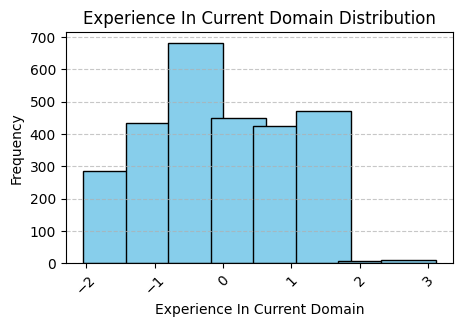

In [1021]:
experience_data = df['ExperienceInCurrentDomain']

# Count the frequency of each unique value
value_counts = experience_data.value_counts()

# Sort the values by their index (Experience values)
sorted_counts = value_counts.sort_index()

# Create a bar plot to show the distribution of unique values
plt.figure(figsize=(5,3))
plt.bar(sorted_counts.index, sorted_counts.values, color='skyblue', edgecolor='black')
plt.title('Experience In Current Domain Distribution')
plt.xlabel('Experience In Current Domain')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

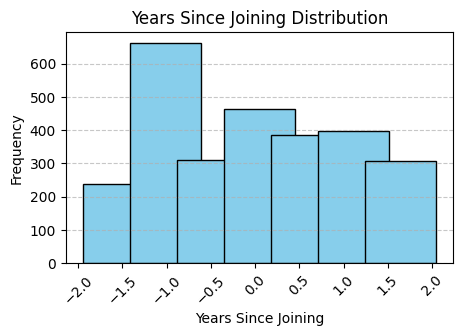

In [1022]:
years_since_joining = df['YearsSinceJoining']

# Count the frequency of each unique value
value_counts = years_since_joining.value_counts()

# Sort the values by their index (Experience values)
sorted_counts = value_counts.sort_index()

# Create a bar plot to show the distribution of unique values
plt.figure(figsize=(5,3))
plt.bar(sorted_counts.index, sorted_counts.values, color='skyblue', edgecolor='black')
plt.title('Years Since Joining Distribution')
plt.xlabel('Years Since Joining')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Question a - 4 => Discretization

Here, I have done the Equal Frequency Discretization for Age columns - Since Age is a skewed distribution (So I haven't done Equal width discritization)

In [1023]:
age_bins = pd.qcut(df['Age'], q=6, labels=None, retbins=True, duplicates='raise')
df['Age Bins'] = pd.cut(x=df['Age'], bins=age_bins[1])
df.head()

,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,YearsSinceJoining,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes,Age Bins
0,3,34,-1.642132,False,-1.012701,1,0,0,1,0,0,0,1,1,0,"(33.0, 37.0]"
1,1,28,0.220853,True,1.108637,1,0,0,0,0,1,1,0,1,0,"(26.0, 28.0]"
2,3,38,-0.400142,False,0.578303,1,0,0,0,1,0,1,0,1,0,"(37.0, 41.0]"
3,3,27,1.462843,True,-0.482367,0,1,0,1,0,0,0,1,1,0,"(26.0, 28.0]"
4,3,24,-0.400142,True,-1.012701,0,1,0,0,0,1,0,1,0,1,"(22.0, 26.0]"


In [1024]:
unique_counts = df['Age Bins'].value_counts()
print(unique_counts)

(26.0, 28.0]    583
(22.0, 26.0]    548
(33.0, 37.0]    468
(37.0, 41.0]    426
(28.0, 30.0]    366
(30.0, 33.0]    342
Name: Age Bins, dtype: int64


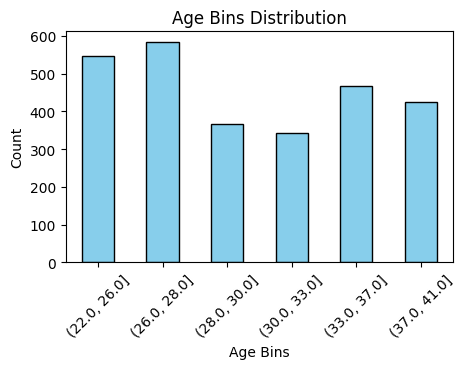

In [1025]:
# Calculate the counts of each age bin category
age_bin_counts = df['Age Bins'].value_counts()

# Sort the counts by index (i.e., the category labels)
age_bin_counts = age_bin_counts.sort_index()

# Create a bar plot
plt.figure(figsize=(5,3))
age_bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age Bins Distribution')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [1026]:
# Drop the 'JoiningYear' column
df.drop(columns=['Age'], inplace=True)

## Encoding for Age and PaymentTier columns

In [1027]:
# Perform one-hot encoding on the 'Age Bins' column
df = pd.get_dummies(df, columns=['Age Bins'], prefix='AgeBin')

In [1028]:
# Perform one-hot encoding on the 'PaymentTier' column
df = pd.get_dummies(df, columns=['PaymentTier'], prefix='PaymentTier')

In [1029]:
df.head()

,ExperienceInCurrentDomain,LeaveOrNot,YearsSinceJoining,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,...,EverBenched_Yes,"AgeBin_(22.0, 26.0]","AgeBin_(26.0, 28.0]","AgeBin_(28.0, 30.0]","AgeBin_(30.0, 33.0]","AgeBin_(33.0, 37.0]","AgeBin_(37.0, 41.0]",PaymentTier_1,PaymentTier_2,PaymentTier_3
0,-1.642132,False,-1.012701,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.220853,True,1.108637,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
2,-0.400142,False,0.578303,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1.462843,True,-0.482367,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,-0.400142,True,-1.012701,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1


In [1030]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 4651
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ExperienceInCurrentDomain  2764 non-null   float64
 1   LeaveOrNot                 2764 non-null   bool   
 2   YearsSinceJoining          2764 non-null   float64
 3   Education_Bachelors        2764 non-null   uint8  
 4   Education_Masters          2764 non-null   uint8  
 5   Education_PHD              2764 non-null   uint8  
 6   City_Bangalore             2764 non-null   uint8  
 7   City_New Delhi             2764 non-null   uint8  
 8   City_Pune                  2764 non-null   uint8  
 9   Gender_Female              2764 non-null   uint8  
 10  Gender_Male                2764 non-null   uint8  
 11  EverBenched_No             2764 non-null   uint8  
 12  EverBenched_Yes            2764 non-null   uint8  
 13  AgeBin_(22.0, 26.0]        2764 non-null   uint8

# Question b => MLP model

In [1031]:
import torch
import torch.nn as nn #neural network module
import torch.optim as optim #optimizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from torch.utils.tensorboard import SummaryWriter

## Step 1 - Data Preparation

### Setting X and Y columns

In [1032]:
X = df.drop(columns=['LeaveOrNot'])  # X contains all columns except 'LeaveOrNot'
y = df['LeaveOrNot']  # Y contains only the 'LeaveOrNot' column - Target variable - Predicting employee Leave or Not

### Splitting dataset for training and testing

In [1033]:
# In this case, 80% of the data is used for training, and 20% is reserved for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply SMOTE Technique to address class imbalance issue

In [1034]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples
X_train, y_train = smote.fit_resample(X_train, y_train)

### Converting to Tensors datatype in pytorch

In [1035]:
# Convert the training and testing data to numpy arrays - Since we are unable to convert dataframe to pytorch tensors directly
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [1036]:
# Converting into corresponding tensors in pytorch - because does not work with numpy
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [1037]:
# Create a SummaryWriter to log data for TensorBoard
writer = SummaryWriter()

## Step 2: Define the MLP Model - Multi Layer Perceptron Model

The following code defines an MLP with two layers: one hidden layer and one output layer.

In [1038]:
class MLP(nn.Module):

    # Inside the constructor (__init__ method), you define the architecture of your neural network.

    # input_size: The number of features in input data.
    # hidden_size: The number of neurons in hidden layer.
    # num_classes: The number of output classes or categories in classification task - Neurons in output layer.

    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()

        # Layer Definitions:

        # This line defines the first fully connected (linear) layer. It takes the input features, which have input_size dimensions, and transforms them into hidden_size dimensions.
        self.fc1 = nn.Linear(input_size, hidden_size)

        # This line defines the activation function used after the first linear layer. In this case, it's the Rectified Linear Unit (ReLU) activation function, which introduces non-linearity into the network.
        self.activation1 = nn.ReLU()

        # Weight initialization for layer 1 - He method for ReLu activation function
        torch.torch.nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')

        #  This line defines the second fully connected (linear) layer. It takes the output of the hidden layer, which has hidden_size dimensions, and transforms it into num_classes dimensions.
        self.fc2 = nn.Linear(hidden_size, num_classes)

        #Since output layer contains 1 neuron - binary classification task, we are using sigmoid activation function (default one is softmax)
        self.activation2 = nn.Sigmoid()

        # Weight initialization for layer 2 - Xavier method for sigmoid activation function
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    # In the forward method, defining forward pass of neural network.
    def forward(self, x):
        x = self.fc1(x)
        x = self.activation1(x)
        x = self.fc2(x)
        x = self.activation2(x)
        return x

In [1039]:
input_size = X_train.shape[1]
hidden_size =256
num_classes = 1 #how many neurons in the output layer
#if no of unique values in Y greater than 2 - then no.of neurons=no.of unique values, but if it is 2 - then both 1 and 2 neurons are possible in output layer

# Instance of the MLP class is created.
model = MLP(input_size, hidden_size, num_classes)

## Step 3: Define a Loss Function

In [1040]:
#if num_classes more than 2, it should be crossEntropy loss, but for this case it should be binary cross entrophy loss - since num_classes = 1
criterion = nn.BCELoss()

## Step 4: Choose an Optimizer

In [1041]:
#SGD - Stochastic Gradient Decent is used
# lr (learning rate)
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

## Step 5: Training Loop

In [1042]:
num_epochs = 300
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    #delta w needs to be zero before you start calculation, otherwise old delta w values also will be added
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log the loss for each epoch
    writer.add_scalar('Loss/train', loss.item(), epoch)

## Step 6: Evaluation - Inference

Since it's an inferencing task any parameters should not be changed

In [1046]:
threshold = 0.5  # Set your desired threshold value

with torch.no_grad():

    #Set your model to evaluation mode
    model.eval()

    # Pass the input data through the model to get predictions
    y_pred = model(X_test)

    # Apply the custom threshold to the predicted probabilities
    predicted = (y_pred >= threshold).int()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, predicted, average='weighted')
    recall = recall_score(y_test, predicted, average='weighted')
    f1 = f1_score(y_test, predicted, average='weighted')

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted)

print(f"Accuracy: {accuracy* 100:.2f}%'")
print(f"Precision: {precision}")
print(f"Recall: {recall* 100:.2f}%'")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 61.12%'
Precision: 0.6208627935172688
Recall: 61.12%'
F1 Score: 0.6143817124743031
Confusion Matrix:
[[211 122]
 [ 93 127]]


# Question c

## Question c - 1 => Weight Initializations

### Zero initializations


torch.nn.init.zeros_(self.fc1.weight)

torch.nn.init.zeros_(self.fc2.weight)

I have changed both initialization for zero initialization and for this their **accuracy was 24%**

### Random initializations

If we don't specify any weight initialization method explicitly, then PyTorch will use its default random initialization method for the linear layers.

or

You can specify explicitly

nn.init.normal_(self.fc1.weight, mean=0, std=0.01)

Adjust the mean and std parameters to control the mean and standard deviation of the distribution from which the weights are sampled.

Here **accuracy is 58%**

### Initialization based on activation function

For ReLU activation function: I have used He initialization

For Tanh, softmax and sigmoid: I have used Xavier initialization

For layer 1 - I have used weight initialization based on activation function I have changed

torch.nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')  -->> Accuracy: 74%

or

torch.nn.init.xavier_uniform_(self.fc2.weight)  -->> Accuracy: 63%



## Question c - 2 => Activation Function

Since it's a binary classification task, always I stick with Sigmoid activation for layer 2

For layer 1, I changed the activation functions : ReLU, Tanh, Softmax

self.activation1 = nn.ReLU() -->> Accuracy: 74%

self.activation1 = nn.Tanh() -->> Accuracy: 63%

self.activation1 = nn.Softmax() -->> Accuracy: 56%

## Question c - 3 => trial-error based hyper-parameter training

Hyper-parameters which I have changed and tried again and again are

1) Learning rate : 0.1, 0.01, 0.05, 0.001 -->> Among them 0.01 gives me the highest accuracy

2) Number of Hidden Neurons (hidden_size): 16, 32, 64, 128, and 256 -->> Among them 64 gives me the highest accuracy

3) Number of epochs: 100, 150, 200, 250, 300, 500, 1000 -->> Among them 200 gives me the highest accuracy

4) Momentum: Without defining, 0.8, 0.9, 0.95 -->> Among them 0.9 gives me the highest accuracy

Other than this - I have increased the number of hidden layers as well - But it doesnot give any increase in accuracy - code is given below for 3 layer architecture

In [1044]:
# Step 2: Define the MLP Model for three layer

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.activation1 = nn.ReLU()
        torch.nn.init.kaiming_uniform_(self.fc1.weight,nonlinearity='relu') #He weight initialization

        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.activation2 = nn.ReLU()
        torch.nn.init.kaiming_uniform_(self.fc1.weight,nonlinearity='relu') #He weight initialization

        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.activation3 = nn.Sigmoid()
        torch.nn.init.xavier_uniform_(self.fc2.weight) # Xavier weight initialization

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation1(x)
        x = self.fc2(x)
        x = self.activation2(x)
        x = self.fc3(x)
        x = self.activation3(x)
        return x

In [1045]:
def weight_histograms_conv2d(writer, step, weights, layer_number):
  weights_shape = weights.shape
  num_kernels = weights_shape[0]
  for k in range(num_kernels):
    flattened_weights = weights[k].flatten()
    tag = f"layer_{layer_number}/kernel_{k}"
    writer.add_histogram(tag, flattened_weights, global_step=step, bins='tensorflow')


def weight_histograms_linear(writer, step, weights, layer_number):
  flattened_weights = weights.flatten()
  tag = f"layer_{layer_number}"
  writer.add_histogram(tag, flattened_weights, global_step=step, bins='tensorflow')


def weight_histograms(writer, step, model):
  # Iterate over all model layers
  for module in model.modules():
    if not isinstance(module, nn.Sequential):
    #compute weight histograms for appropriate layer
      if isinstance(module, nn.Conv2d):
        weights = module.weight
        weight_histograms_conv2d(writer, step, weights, module)
      elif isinstance(module, nn.Linear):
        weights = module.weight
        weight_histograms_linear(writer, step, weights, module)
        bias = module.bias
        weight_histograms_linear(writer, step, bias, module)

In [982]:
input_size = X_train.shape[1]
hidden_size1 =128
hidden_size2 =64
num_classes = 1
model = MLP(input_size, hidden_size1, hidden_size2, num_classes)

# Step 3: Define a Loss Function
criterion = nn.BCELoss()

# Step 4: Choose an Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Step 5: Training Loop
num_epochs = 300
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log the loss for each epoch
    writer.add_scalar('Loss/train', loss.item(), epoch)

    # Visualize weight histograms
    weight_histograms(writer, epoch, model)


threshold = 0.5  # Set your desired threshold value

# Step 6: Evaluation - Inference
with torch.no_grad():

    #Set your model to evaluation mode
    model.eval()

    # Pass the input data through the model to get predictions
    y_pred = model(X_test)

    # Apply the custom threshold to the predicted probabilities
    predicted = (y_pred >= threshold).int()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, predicted, average='weighted')
    recall = recall_score(y_test, predicted, average='weighted')
    f1 = f1_score(y_test, predicted, average='weighted')

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted)

print(f"Accuracy: {accuracy* 100:.2f}%'")
print(f"Precision: {precision}")
print(f"Recall: {recall* 100:.2f}%'")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Close the SummaryWriter
writer.close()

Accuracy: 60.22%'
Precision: 0.5844233349337473
Recall: 60.22%'
F1 Score: 0.5834559596942646
Confusion Matrix:
[[258  75]
 [145  75]]


# Question d

I have evaluated based on Accuracy, Precesion, F1 score, and Recall. In addition to that I have printed confusion matrix as well in order to see true positive, false positive, true negative and fasle negative values.

I have adjusted the threshold = 0.5  level to change false positve and false negative rates (misclassification).

If I set threshold to 0.4, higher probability of misclassification of false positive and If I set threshold to 0.6, higher probability of misclassification of flase negative. We have to determine that based on which cost is higher -->> false positive or false negative.